In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\harip\\Desktop\\Datascience\\data\\Housing.csv')
df.shape

(545, 13)

In [4]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [5]:
df = df.iloc[:,0:2]

In [6]:
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


SIMPLE LINEAR REGRESSION MODEL

In [7]:
# Model selection
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

before building a model , we will visualize the spread of the data : To find the linearity

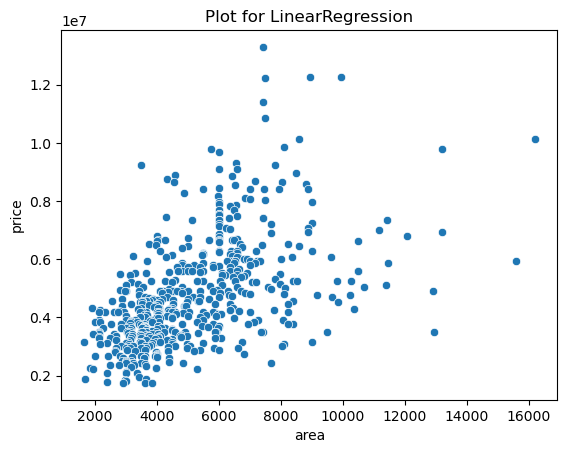

In [8]:
# scatter plot
sns.scatterplot(x = df.area, y = df.price, data = df)
plt.title('Plot for LinearRegression')
plt.show()

To find the Co-Relation

In [9]:
df.corr()
# This uses a pearson-corelation

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


c:\Users\harip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


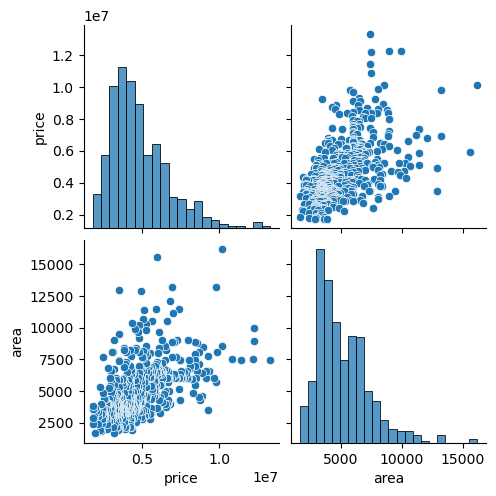

In [10]:
# one more plot
sns.pairplot(df)
plt.show()
# Observation there are outliers

Divide the data into dependent and in-dependent features

In [11]:
X = df.area
type(X) # pandas.core.series.Series

# but we need a dataframe
# NOTE The independent feature must always be in a DATAFRAME
X = df[['area']]
type(X) # pandas.core.frame.DataFrame
X.shape

(545, 1)

In [12]:
y = df.price
type(y)
y.shape # Dependent feature can be in series or 1-d array, cause it is one col 

(545,)

In [13]:
X.head()

,area
0,7420
1,8960
2,9960
3,7500
4,7420


In [14]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [16]:
print(f'X_train :{X_train.shape},y_train:{y_train.shape},X_test : {X_test.shape},y_test : {y_test.shape}')

X_train :(436, 1),y_train:(436,),X_test : (109, 1),y_test : (109,)


Now lets apply STANDARDIZATION CAUSE THE VALUE IS TOO MUCH 
* by applying the z-score : Z = Xi - MEAN / SD

Cause it will take more time to rach to the Gloabal Minima 

In [17]:
# Applying the standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Here we are only standardizing the input feature and not the output feature 
* GRADIENT DESCENT IS ONLY APPLIED ON THE INDEPENDENT FEATURES

In [18]:
X_train = scaler.fit_transform(X_train)

Now we apply the same to the X_test , but we do not apply fit_transform

Instead we only use Transform 
* here you will use the mean and df from the train , so only Transform
* why ? : DATA LEAKAGE 
* MY TEST DATA MUST NOT KNOW ANYTHING ABOUT THE TRAIN DATA

In [19]:
X_test = scaler.transform(X_test)

Building the Linear Regresison model

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

Slope
* 1 movement in X axis , it is moving 915828.51431 movement in Y axis

In [21]:
lr.coef_

array([915828.51431225])

Intercept
* At what point are you meeting Y-axis when x = 0

In [22]:
lr.intercept_

4677828.9908256885

In [23]:
# so
y = lr.coef_ * 7420 + lr.intercept_
y

array([6.80012541e+09])

Plotting the data keeping the Training data

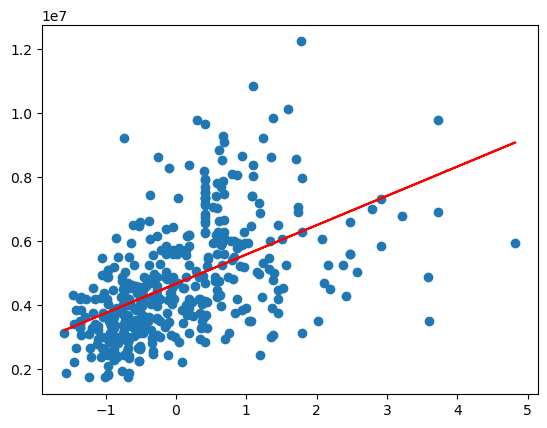

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color = 'red')

In [25]:
y_pred = lr.predict(X_test)

In order to checke the model Performace, we will use some performance metrics

In [26]:
from sklearn.metrics import r2_score
accuracy  = r2_score(y_test,y_pred)

In [27]:
accuracy
# when you add nrows  = 100 , meaning you have multiple outliers in the data 

0.28682306710531336

In [28]:
# for addjusted R2
adj_r_sqr = 1 - (1 - accuracy ) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)

In [29]:
adj_r_sqr

0.28015786212498917

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

[Linear Regression Error Metrics / Performance Metrics Revision](https://www.youtube.com/watch?v=BGlEv2CTfeg&t=4s)

In [31]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)
from math import *
print(sqrt(mse))

3580649472363.312
1331571.3257389246
1892260.4134640961
